In [2]:
#initialization
import numpy as np

# importing Qiskit
from qiskit import *
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [3]:
# making oracle circuit
oracle=QuantumCircuit(5,name="Oracle")

# multi-controlled x gate
gate=MCXGate(3)

# Applying controlled z gate (control qbits-q0,q1,q3  target- q2)
oracle.h(2)
oracle.append(gate,[0,1,3,2])
oracle.h(2)

# Applying controlled z gate (control qbits- q0,q1,q3  target- q4)
oracle.h(4)
oracle.append(gate,[0,1,3,4])
oracle.h(4)

oracle.to_gate()
oracle.draw()



q_0: ───────■─────────■───────
            │         │       
q_1: ───────■─────────■───────
     ┌───┐┌─┴─┐┌───┐  │       
q_2: ┤ H ├┤ X ├┤ H ├──┼───────
     └───┘└─┬─┘└───┘  │       
q_3: ───────■─────────■───────
     ┌───┐          ┌─┴─┐┌───┐
q_4: ┤ H ├──────────┤ X ├┤ H ├
     └───┘          └───┘└───┘

In [4]:
# Initializing grovers circuit
qr=QuantumRegister(5)
cr=ClassicalRegister(5)
grover_circ=QuantumCircuit(qr,cr)

# creating uniform superposition
grover_circ.h(range(5))

# Adding oracle to circuit
grover_circ.append(oracle,[0,1,2,3,4])

grover_circ.draw()

┌───┐┌─────────┐
q0_0: ┤ H ├┤0        ├
      ├───┤│         │
q0_1: ┤ H ├┤1        ├
      ├───┤│         │
q0_2: ┤ H ├┤2 Oracle ├
      ├───┤│         │
q0_3: ┤ H ├┤3        ├
      ├───┤│         │
q0_4: ┤ H ├┤4        ├
      └───┘└─────────┘
c0: 5/════════════════

In [5]:
# testing oracle using statevector simulator
backend=Aer.get_backend('statevector_simulator')
job=execute(grover_circ,backend)
result=job.result()
sv=result.get_statevector()

# winner states have a -ve phase
print("The StateVector is:")
print(np.around(sv,6))

# probablities of all states are equal
print("The probabilities of states:")
print(sv.probabilities())

The StateVector is:
[ 0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j
  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j
  0.176777+0.j  0.176777-0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j
 -0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j
  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j  0.176777+0.j
  0.176777+0.j  0.176777+0.j -0.176777+0.j  0.176777+0.j  0.176777+0.j
  0.176777+0.j  0.176777-0.j]
The probabilities of states:
[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]


In [6]:
# Diffusion operator (U_s)
diffuser=QuantumCircuit(5,name='Diffuser')

# Applying transformation |s> -> |00..0> 
diffuser.h(range(5))

# Applying transformation |00..0> -> |11..1>
diffuser.x(range(5))

# multi-controlled x gate 
Gate=MCXGate(4)

#  Applying multi-controlled z gate (reflection about |11..1>)
diffuser.h(4)
diffuser.append(Gate,[0,1,2,3,4])
diffuser.h(4)

# Applying transformation |11..1> -> |00..0>
diffuser.x(range(5))

# Applying transformation |00..0> -> |s>
diffuser.h(range(5))

diffuser.to_gate()
diffuser.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [7]:
# Adding diffuser to circuit
grover_circ.append(diffuser,[0,1,2,3,4])

# Applying Amplitude Modification one more times
grover_circ.append(oracle,[0,1,2,3,4])
grover_circ.append(diffuser,[0,1,2,3,4])

grover_circ.draw()


┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐
q0_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├
      ├───┤│         ││           ││         ││           │
q0_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├
      ├───┤│         ││           ││         ││           │
q0_2: ┤ H ├┤2 Oracle ├┤2 Diffuser ├┤2 Oracle ├┤2 Diffuser ├
      ├───┤│         ││           ││         ││           │
q0_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├
      ├───┤│         ││           ││         ││           │
q0_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├
      └───┘└─────────┘└───────────┘└─────────┘└───────────┘
c0: 5/═════════════════════════════════════════════════════

In [8]:
# testing our circuit using statevector simulator
backend=Aer.get_backend('statevector_simulator')
job=execute(grover_circ,backend)
result=job.result()
sv=result.get_statevector()

print("The StateVector is:")
print(np.around(sv,6))

# probablities of winner states increses
print("The probabilities of states:")
print(sv.probabilities())

The StateVector is:
[0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j
 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j
 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j
 0.673961+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j
 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j 0.055243+0.j
 0.055243+0.j 0.055243+0.j 0.673961+0.j 0.055243+0.j 0.055243+0.j
 0.055243+0.j 0.055243+0.j]
The probabilities of states:
[0.00305176 0.00305176 0.00305176 0.00305176 0.00305176 0.00305176
 0.00305176 0.00305176 0.00305176 0.00305176 0.00305176 0.00305176
 0.00305176 0.00305176 0.00305176 0.45422363 0.00305176 0.00305176
 0.00305176 0.00305176 0.00305176 0.00305176 0.00305176 0.00305176
 0.00305176 0.00305176 0.00305176 0.45422363 0.00305176 0.00305176
 0.00305176 0.00305176]


In [9]:
# measuring the qbits
grover_circ.measure(qr,cr)

# final circuit
grover_circ.draw()

┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─┐            
q0_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤M├────────────
      ├───┤│         ││           ││         ││           │└╥┘┌─┐         
q0_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├─╫─┤M├─────────
      ├───┤│         ││           ││         ││           │ ║ └╥┘┌─┐      
q0_2: ┤ H ├┤2 Oracle ├┤2 Diffuser ├┤2 Oracle ├┤2 Diffuser ├─╫──╫─┤M├──────
      ├───┤│         ││           ││         ││           │ ║  ║ └╥┘┌─┐   
q0_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├─╫──╫──╫─┤M├───
      ├───┤│         ││           ││         ││           │ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├─╫──╫──╫──╫─┤M├
      └───┘└─────────┘└───────────┘└─────────┘└───────────┘ ║  ║  ║  ║ └╥┘
c0: 5/══════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                            0  1  2  3  4

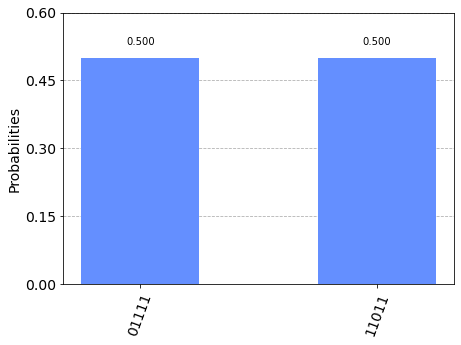

In [10]:
# simulating our circuit in a quantum simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 2

results = execute(grover_circ, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)